In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('http://bit.ly/csml-cca')
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,TARGET
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+


### Dataset of a credit card company in Japan

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
A1        690 non-null object
A2        690 non-null object
A3        690 non-null object
A4        690 non-null object
A5        690 non-null object
A6        690 non-null object
A7        690 non-null object
A8        690 non-null object
A9        690 non-null object
TARGET    690 non-null object
dtypes: object(10)
memory usage: 54.0+ KB


### Clean data, transform data into numbers

In [7]:
df['A1'].unique()

array(['b', 'a', '?'], dtype=object)

In [8]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'TARGET'], dtype='object')

In [23]:
for c in df.columns:
    print(c)
    print(df[c].unique())

A1
['b' 'a']
A2
['u' 'y' 'l']
A3
['g' 'p' 'gg']
A4
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
A5
['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
A6
['t' 'f']
A7
['t' 'f']
A8
['f' 't']
A9
['g' 's' 'p']
TARGET
['+' '-']


### See how many unknown data

In [21]:
for c in df.columns:
    print(c)
    print(df[df[c] == '?'][c].value_counts())
    

A1
Series([], Name: A1, dtype: int64)
A2
Series([], Name: A2, dtype: int64)
A3
Series([], Name: A3, dtype: int64)
A4
Series([], Name: A4, dtype: int64)
A5
Series([], Name: A5, dtype: int64)
A6
Series([], Name: A6, dtype: int64)
A7
Series([], Name: A7, dtype: int64)
A8
Series([], Name: A8, dtype: int64)
A9
Series([], Name: A9, dtype: int64)
TARGET
Series([], Name: TARGET, dtype: int64)


### Not too many unknowns, so drop the entire row if there's '?'

In [16]:
df2 = df.drop(df[df['A1']== '?'].index, axis=0)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 689
Data columns (total 10 columns):
A1        678 non-null object
A2        678 non-null object
A3        678 non-null object
A4        678 non-null object
A5        678 non-null object
A6        678 non-null object
A7        678 non-null object
A8        678 non-null object
A9        678 non-null object
TARGET    678 non-null object
dtypes: object(10)
memory usage: 58.3+ KB


In [19]:
for c in df.columns:
    df.drop(df[df[c]== '?'].index, axis=0, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 0 to 689
Data columns (total 10 columns):
A1        671 non-null object
A2        671 non-null object
A3        671 non-null object
A4        671 non-null object
A5        671 non-null object
A6        671 non-null object
A7        671 non-null object
A8        671 non-null object
A9        671 non-null object
TARGET    671 non-null object
dtypes: object(10)
memory usage: 57.7+ KB


### Transform dataset into numbers

In [26]:
di = {'+':1, '-':0}
df.replace({'TARGET':di}, inplace=True)


0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
659    0
660    0
661    0
662    0
663    0
664    0
665    0
666    0
667    0
668    0
669    0
670    0
671    0
672    0
674    0
675    0
676    0
677    0
678    0
679    0
680    0
681    0
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
Name: TARGET, Length: 671, dtype: int64

In [27]:
df['TARGET'].unique()

array([1, 0])

### Dummies variable technique

In [30]:
df_dummies = pd.get_dummies(df, columns=df.columns[:-1], drop_first=True)

In [31]:
df_dummies.head()

,TARGET,A1_b,A2_u,A2_y,A3_gg,A3_p,A4_c,A4_cc,A4_d,A4_e,...,A5_j,A5_n,A5_o,A5_v,A5_z,A6_t,A7_t,A8_t,A9_p,A9_s
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


### Model Training 

In [34]:
y = df_dummies.iloc[:, 0].values
X = df_dummies.iloc[:, 1:]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(536, 31) (536,)
(135, 31) (135,)


In [36]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0])

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        75
           1       0.77      0.72      0.74        60

   micro avg       0.78      0.78      0.78       135
   macro avg       0.78      0.77      0.77       135
weighted avg       0.78      0.78      0.78       135



In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7777777777777778

### KN prediction method

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy_score(y_test, predictions)

0.8444444444444444

### How to to improve our model

In [48]:
k = np.arange(3, 300, 2)
print(k)
    

[  3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35  37
  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73
  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107 109
 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145
 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181
 183 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215 217
 219 221 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251 253
 255 257 259 261 263 265 267 269 271 273 275 277 279 281 283 285 287 289
 291 293 295 297 299]


In [49]:
results = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    results.append(accuracy_score(y_test, predictions))

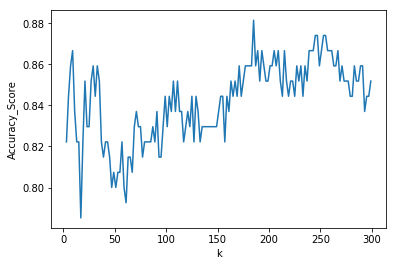

In [50]:
plt.plot(k, results)
plt.xlabel('k')
plt.ylabel('Accuracy_Score')
plt.show()